# Overview
This project, titled "Rice Production Trends and Fertilizer Policy Effects in Sri Lanka: A Data-Driven Study", aims to gather and analyze data on rice production in Sri Lanka. By scraping data from a web source, it extracts key information about rice area, yield, and production, processes the data into structured formats like tables, and visualizes it using Python libraries.

The primary focus is on web scraping using BeautifulSoup to parse HTML and Pandas for data manipulation, followed by data visualization using Matplotlib and Seaborn. Additionally, the project examines the impact of Sri Lanka's fertilizer policy, particularly the 2021-2023 ban on chemical fertilizers, on rice yield and production trends.

### Import Libraries

In [131]:
# Import necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the html content

In [3]:
# Load the HTML content of the website using the requests library

URL = 'https://ipad.fas.usda.gov/countrysummary/Default.aspx?id=CE&crop=Rice'
page = requests.get(URL)
page

<Response [200]>

### Load the html content

In [92]:
# Parse the HTML content using BeautifulSoup for easier data extraction

soup = BeautifulSoup(page.text, 'html')
soup

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
<head id="head1"><title>
	Sri Lanka Rice Area, Yield and Production
</title><meta charset="utf-8"/><meta content="en" name="language"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Crop Explorer Country Summary for Major Crop Regions - United States Department of Agriculture" name="title"/><meta content="Country Summary, Crop forecasting, crop production, crop yield, crop area, commodity, drought, precipitation, temperature, soil moisture, crop stage, crop model, percent soil moisture, surface moisture, subsurface moisture, corn, wheat, spring wheat, Satellite Radar Altimetry, Global Reservoir, Lake Elevation Database" name="keywords"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="https://ipad.fas.usda.gov/images/favicon.ico" media="all" rel="icon" type="image/x-icon"/><link href="stylesheets/b

### Format and Inspect HTML 

In [94]:
# Format the HTML content to make it readable and inspect the structure

pretty_html = soup.prettify()
print(pretty_html)

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head id="head1">
  <title>
   Sri Lanka Rice Area, Yield and Production
  </title>
  <meta charset="utf-8"/>
  <meta content="en" name="language"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Crop Explorer Country Summary for Major Crop Regions - United States Department of Agriculture" name="title"/>
  <meta content="Country Summary, Crop forecasting, crop production, crop yield, crop area, commodity, drought, precipitation, temperature, soil moisture, crop stage, crop model, percent soil moisture, surface moisture, subsurface moisture, corn, wheat, spring wheat, Satellite Radar Altimetry, Global Reservoir, Lake Elevation Database" name="keywords"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://ipad.fas.usda.gov/images/favicon.ico" media="all" rel="icon" type="image/x-

### Extract Text from HTML

In [95]:
# Extract the text content without HTML tags

text_content = soup.get_text()
print(text_content)



	Sri Lanka Rice Area, Yield and Production





































IPAD


International
Production 
Assessment 
Division











Toggle navigation









Reports and Briefs

Commodity Intelligence Reports (CIR)
World Agricultural Production (WAP) Circulars



Geospatial Data

Crop Explorer
Commodity Explorer
Global Agricultural Monitoring (GLAM)
Global Reservoirs and Lakes Monitor (G-REALM)
Global Agricultural & Disaster Assesment System (GADAS)
Geotag Photo Gallery
Tropical Cyclone Monitor Maps
Flood Monitor Maps
Tropical Cyclone Monitor
WMO Station Explorer



Crop Calendars and Production Maps

Country Summary
Crop Calendars
Crop Production Maps
Monthly Crop Stage and Harvest Calendars
Monthly Production and Trade Maps



Other Global USDA Reports

World Agricultural Supply and Demand Estimates (WASDE)
USDA Weekly Weather and Crop Bulletin (NASS/WAOB)
PSD Online 
FAS Attache GAIN Reports
PS&D Market and Trade Data


   Help    
About Us






















FAS 

### Extract Website Title

In [101]:
# displaying the title

for title in soup.find_all('title'):
    print(title.get_text())


	Sri Lanka Rice Area, Yield and Production



### Find and Extract Table Data

In [97]:
# Locate and extract the table containing rice production data from the HTML

table = soup.find('table', id='GridView1')
table

<table border="0" cellpadding="4" cellspacing="0" id="GridView1">
<tr bgcolor="#32740C">
<th class="gridtextcenter" scope="col"><font color="White"><b>Market</b></font></th><th scope="col"><font color="White"><b>Area</b></font></th><th scope="col"><font color="White"><b>Milled Production</b></font></th><th scope="col"><font color="White"><b>Rough Production</b></font></th><th scope="col"><font color="White"><b>Yield</b></font></th>
</tr><tr bgcolor="#32740C">
<th align="center" class="gridtextcenter" colspan="1"><font color="White"><b>Year</b></font></th><th align="center" colspan="1"><font color="White"><b>(1000 Ha)</b></font></th><th align="center" colspan="1"><font color="White"><b>(1000 Tons)</b></font></th><th align="center" colspan="1"><font color="White"><b>(1000 Tons)</b></font></th><th align="center" colspan="1"><font color="White"><b>(T/Ha)</b></font></th>
</tr><tr>
<td align="right" class="gridtextcenter" width="100"><font color="#333333">2014/2015</font></td><td align="righ

### Process Header Rows of the Table

In [98]:
# Extract header rows and combine them
header_rows = soup.find_all('tr', bgcolor="#32740C")
header_cells = []
for i, row in enumerate(header_rows):
    row_cells = [cell.text.strip() for cell in row.find_all(['th'])]
    if i == 0:  # First header row
        header_cells = row_cells

# Second header row (combine)
    else:
        for j, cell in enumerate(row_cells):
            # Safeguard against index mismatch
            if j < len(header_cells):
                header_cells[j] = f"{header_cells[j]} {cell}"
            else:
                header_cells.append(cell)

### Extract Data from Table Rows

In [99]:
# Extract all rows of data (ensure 'rows' is defined correctly)

rows = soup.find_all('tr')  # Make sure to define rows based on your table structure

### Create DataFrame from Scraped Data

In [106]:
# Create DataFrame
data = [[cell.text.strip() for cell in row.find_all(['th', 'td'])] for row in rows[4:17]]  # Adjust row range based on table

# Create DataFrame with combined headers
df = pd.DataFrame(data, columns=header_cells)
df

,Market Year,Area (1000 Ha),Milled Production (1000 Tons),Rough Production (1000 Tons),Yield (T/Ha)
0,2014/2015,931,"2,735","4,022",4.3
1,2015/2016,"1,097","3,294","4,844",4.4
2,2016/2017,686,"2,034","2,991",4.4
3,2017/2018,769,"2,248","3,306",4.3
4,2018/2019,974,"3,132","4,606",4.7
5,2019/2020,973,"3,207","4,716",4.8
6,2020/2021,"1,085","3,390","4,985",4.6
7,2021/2022,"1,130","2,733","4,019",3.6
8,2022/2023,"1,152","2,828","4,159",3.6
9,2023/2024,"1,160","3,332","4,900",4.2


## Clean and Preprocess Data

In [ ]:
# Make a Copy
df_processed = df.copy()

# Handle Commas and Convert to Numeric:
for col in ['Area (1000 Ha)', 'Milled Production (1000 Tons)',
            'Rough Production (1000 Tons)']:
    df_processed[col] = pd.to_numeric(df_processed[col].str.replace(',', ''), errors='coerce')

# Exclude Summary Rows:
df_processed = df_processed[~df_processed['Market Year'].str.contains('Average|Percent', na=False)]

In [109]:
df_processed

,Market Year,Area (1000 Ha),Milled Production (1000 Tons),Rough Production (1000 Tons),Yield (T/Ha)
0,2014/2015,931,2735,4022,4.3
1,2015/2016,1097,3294,4844,4.4
2,2016/2017,686,2034,2991,4.4
3,2017/2018,769,2248,3306,4.3
4,2018/2019,974,3132,4606,4.7
5,2019/2020,973,3207,4716,4.8
6,2020/2021,1085,3390,4985,4.6
7,2021/2022,1130,2733,4019,3.6
8,2022/2023,1152,2828,4159,3.6
9,2023/2024,1160,3332,4900,4.2


In [110]:
# Save as CSV
df_processed.to_csv('rice_data.csv', index=False)

# EDF for understanding rice production trends in Sri Lanka.

In [111]:
# Load the data from the CSV file
df = pd.read_csv('rice_data.csv')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Market Year                    11 non-null     object 
 1   Area (1000 Ha)                 11 non-null     int64  
 2   Milled Production (1000 Tons)  11 non-null     int64  
 3   Rough Production (1000 Tons)   11 non-null     int64  
 4   Yield (T/Ha)                   11 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 572.0+ bytes


In [76]:
df.head(10)

,Market Year,Area (1000 Ha),Milled Production (1000 Tons),Rough Production (1000 Tons),Yield (T/Ha)
0,2014/2015,931,2735,4022,4.3
1,2015/2016,1097,3294,4844,4.4
2,2016/2017,686,2034,2991,4.4
3,2017/2018,769,2248,3306,4.3
4,2018/2019,974,3132,4606,4.7
5,2019/2020,973,3207,4716,4.8
6,2020/2021,1085,3390,4985,4.6
7,2021/2022,1130,2733,4019,3.6
8,2022/2023,1152,2828,4159,3.6
9,2023/2024,1160,3332,4900,4.2


In [117]:
# Basic Statistics

df.describe()

,Area (1000 Ha),Milled Production (1000 Tons),Rough Production (1000 Tons),Yield (T/Ha)
count,11.000000,11.000000,11.000000,11.000000
mean,1009.727273,2948.454545,4335.909091,4.309091
std,161.808585,479.537770,705.175220,0.393585
min,686.000000,2034.000000,2991.000000,3.600000
25%,952.000000,2734.000000,4020.500000,4.250000
50%,1085.000000,3132.000000,4606.000000,4.400000
75%,1140.000000,3313.000000,4872.000000,4.550000
max,1160.000000,3500.000000,5147.000000,4.800000


### Line Chart for Rice Production Over Time:
It helps in identifying growth or decline patterns in rice production.

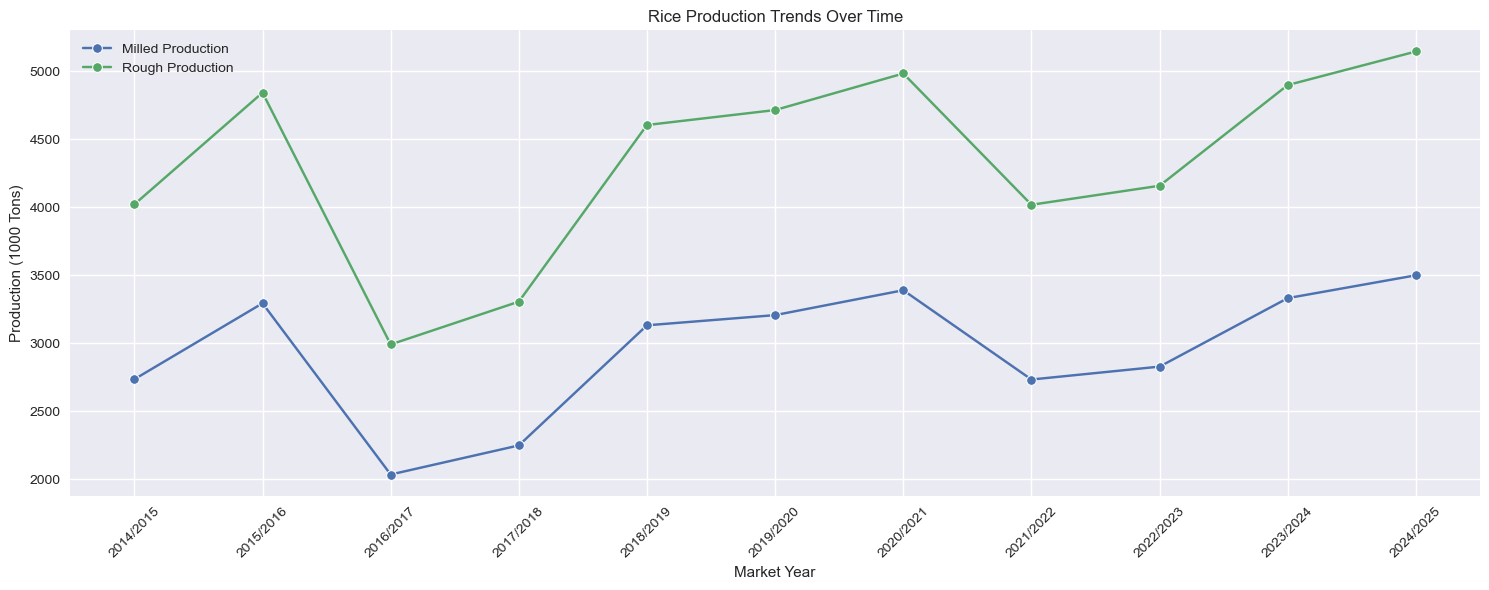

In [130]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Market Year', y='Milled Production (1000 Tons)', marker='o', label='Milled Production')
sns.lineplot(data=df, x='Market Year', y='Rough Production (1000 Tons)', marker='o', label='Rough Production')
plt.title('Rice Production Trends Over Time')
plt.xticks(rotation=45)
plt.ylabel('Production (1000 Tons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Year-wise Comparison of Milled and Rough Production:
This bar plot compares the Milled Production and Rough Production for each year.

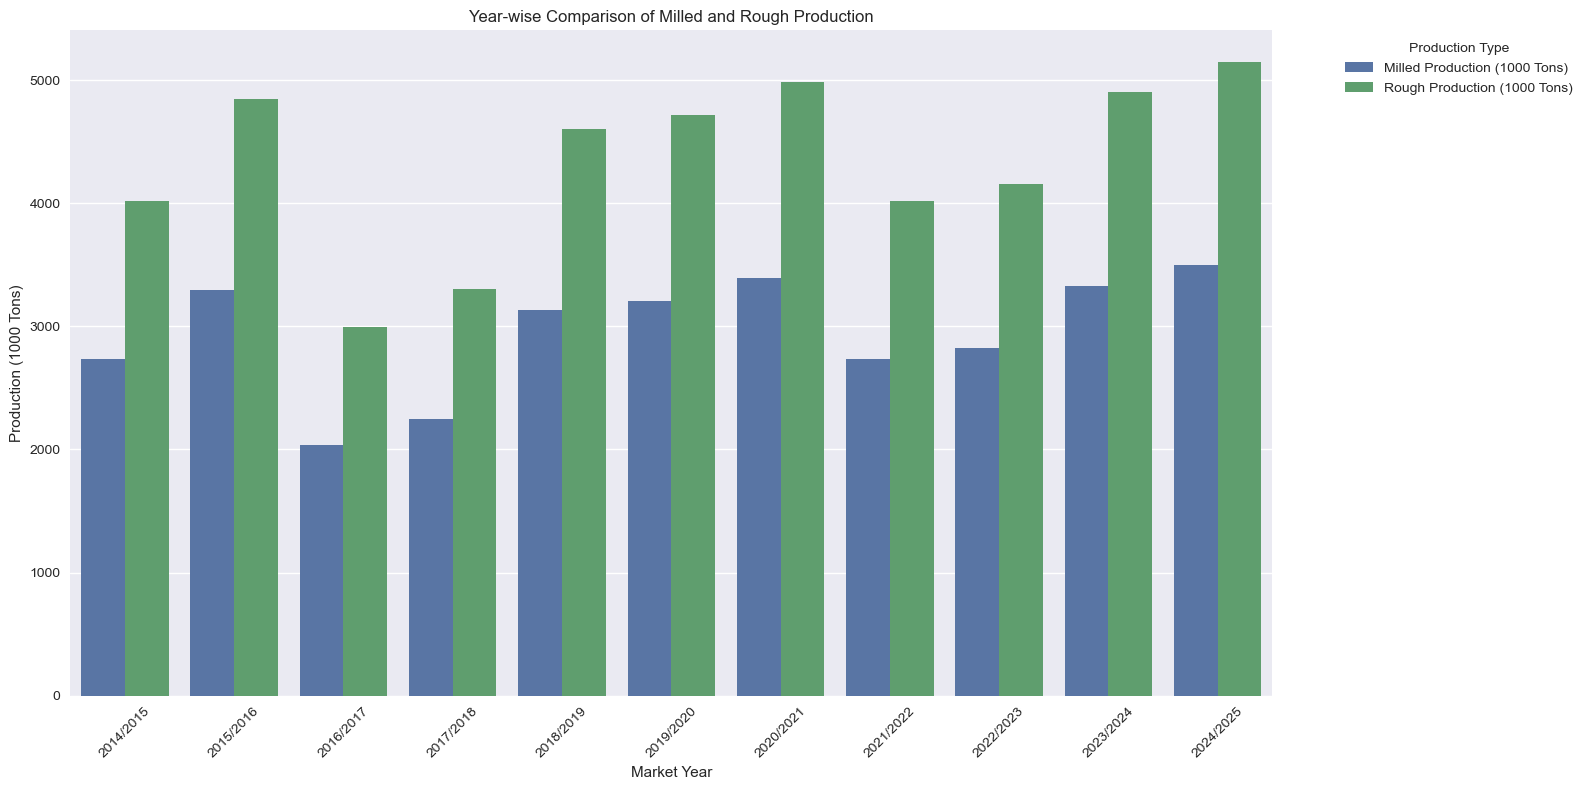

In [115]:
plt.figure(figsize=(16, 8))
df_melted = pd.melt(df, 
                    id_vars=['Market Year'], 
                    value_vars=['Milled Production (1000 Tons)', 
                              'Rough Production (1000 Tons)'],
                    var_name='Production Type',
                    value_name='Production')
sns.barplot(data=df_melted, x='Market Year', y='Production', hue='Production Type')
plt.title('Year-wise Comparison of Milled and Rough Production')
plt.xticks(rotation=45)
plt.ylabel('Production (1000 Tons)')
plt.legend(title='Production Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Distribution of Production Types:
This box plot shows the distribution (spread) of Milled Production and Rough Production values.

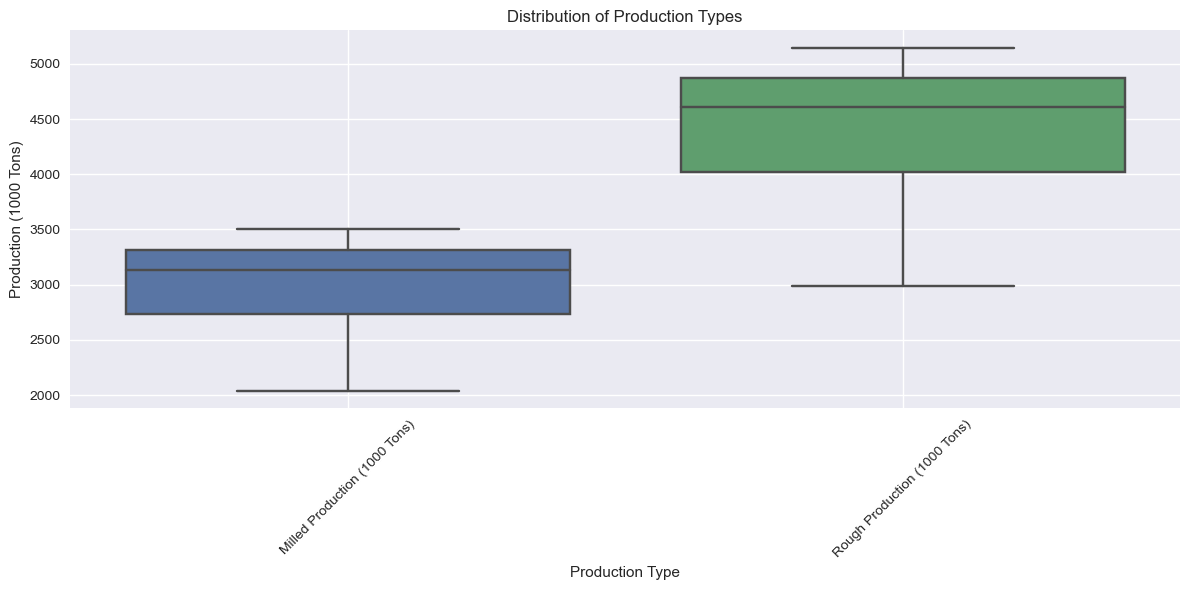

In [116]:
# Production Distribution

plt.figure(figsize=(12, 6))
production_data = pd.melt(df[['Milled Production (1000 Tons)', 'Rough Production (1000 Tons)']])
sns.boxplot(data=production_data, x='variable', y='value')
plt.title('Distribution of Production Types')
plt.xlabel('Production Type')
plt.ylabel('Production (1000 Tons)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cultivated Area Distribution Over Years:
This bar plot shows how the cultivated area has changed over time.
It provides insights into whether the total land used for rice farming has increased or decreased over the years.

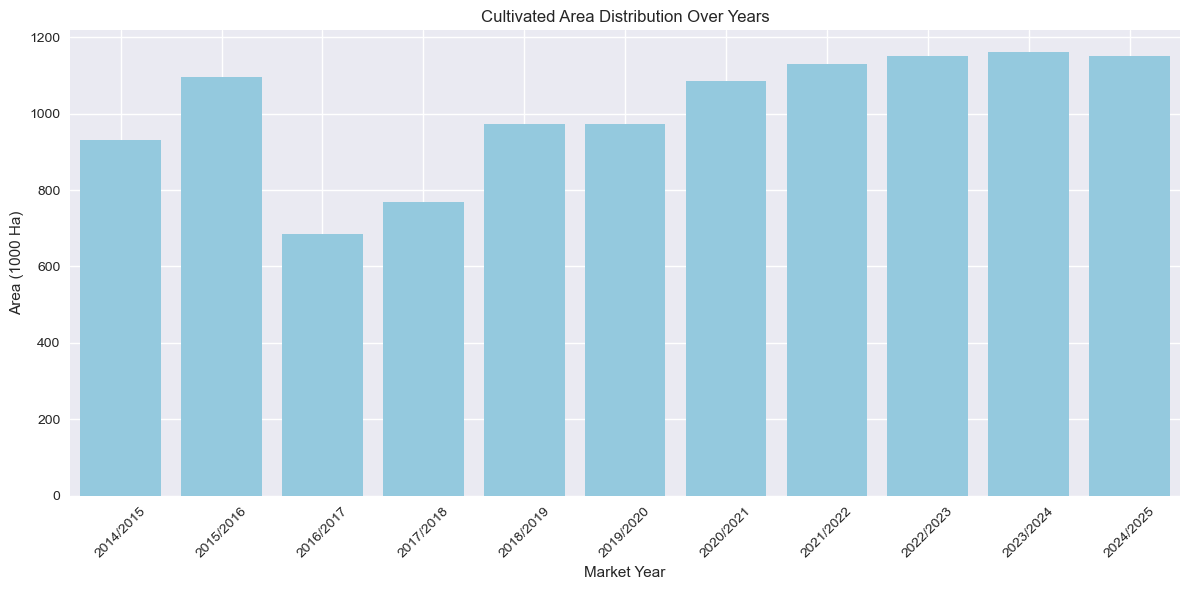

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Market Year', y='Area (1000 Ha)', color='skyblue')
plt.title('Cultivated Area Distribution Over Years')
plt.xticks(rotation=45)
plt.ylabel('Area (1000 Ha)')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Yield Trends Over Time
The line plot displays the yield (Tons per Hectare) over time.
This helps in understanding how rice yield has improved or fluctuated over the years.

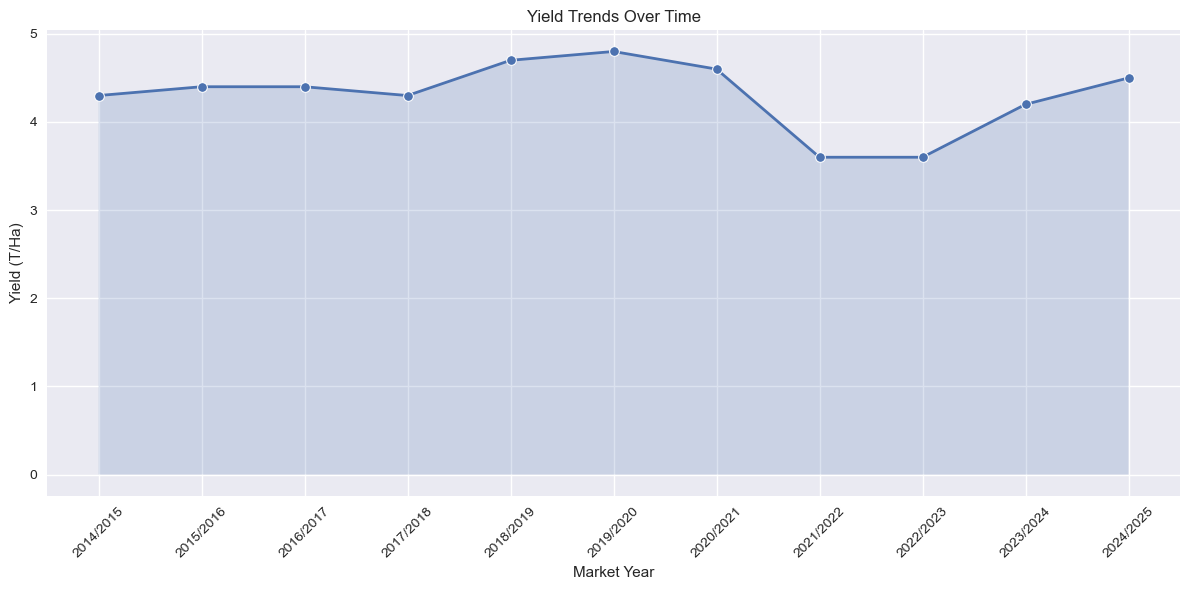

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Market Year', y='Yield (T/Ha)', marker='o', linewidth=2)
plt.fill_between(range(len(df)), df['Yield (T/Ha)'], alpha=0.2)
plt.title('Yield Trends Over Time')
plt.xticks(rotation=45)
plt.ylabel('Yield (T/Ha)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Correlation Heatmap of Variables:
This heatmap shows the correlation between different variables like Area, Production, and Yield.
It helps to see if more area planted correlates with higher yield.

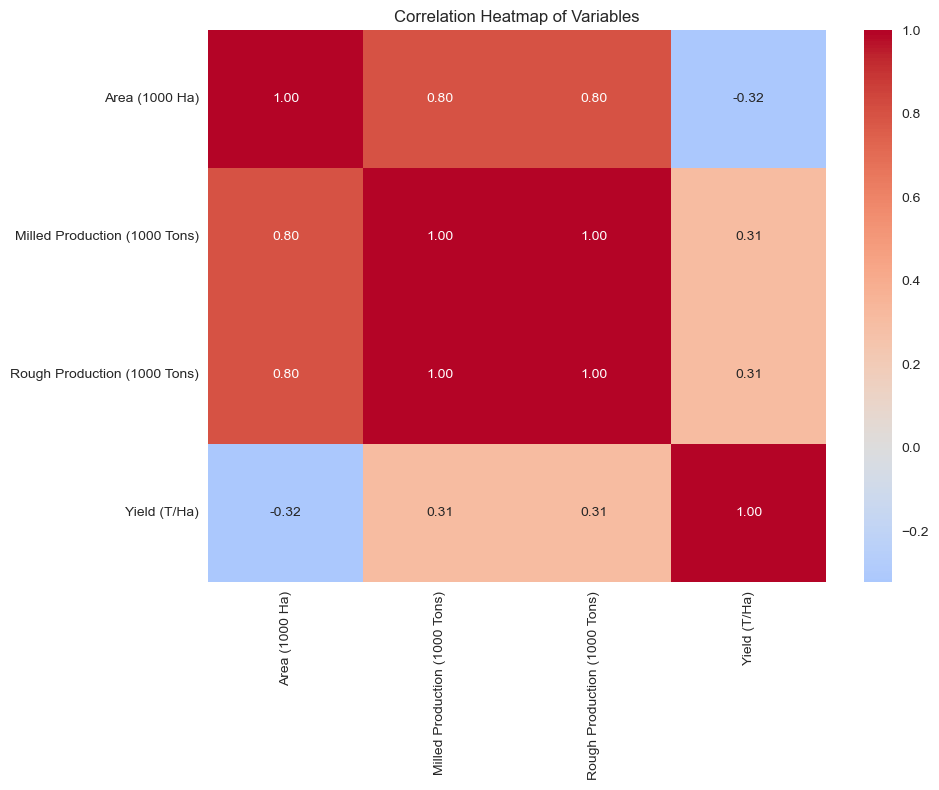

In [120]:
plt.figure(figsize=(10, 8))
correlation = df[['Area (1000 Ha)', 
                 'Milled Production (1000 Tons)', 
                 'Rough Production (1000 Tons)', 
                 'Yield (T/Ha)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Variables')
plt.tight_layout()
plt.show()

### Area vs Yield Scatter Plot with Regression Line and Point Labels (Years)
This scatter plot shows the relationship between area and yield, with a regression line to highlight trends.
The Market Year is annotated on each point, making it easy to see how the relationship evolves over time.

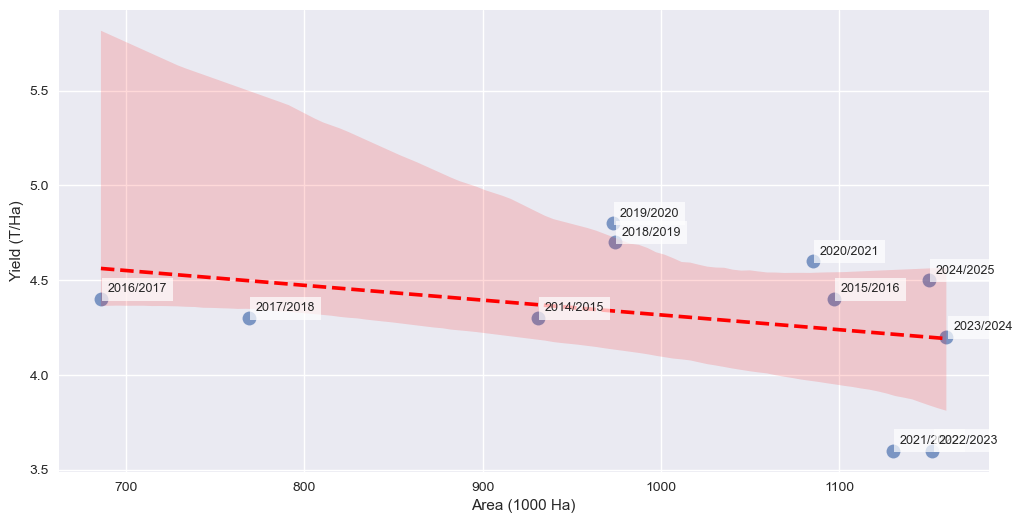

In [122]:
plt.figure(figsize=(12, 6))
# Create scatter plot with regression line
sns.regplot(data=df, 
            x='Area (1000 Ha)', 
            y='Yield (T/Ha)', 
            scatter_kws={'s': 100, 'alpha': 0.7},
            line_kws={'color': 'red', 'linestyle': '--'})

# Add Market Year labels to each point
for idx, row in df.iterrows():
    plt.annotate(row['Market Year'], 
                (row['Area (1000 Ha)'], row['Yield (T/Ha)']),
                xytext=(5, 5),  # 5 points offset
                textcoords='offset points',
                fontsize=9,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

### Area vs Yield Scatter Plot with Correlation

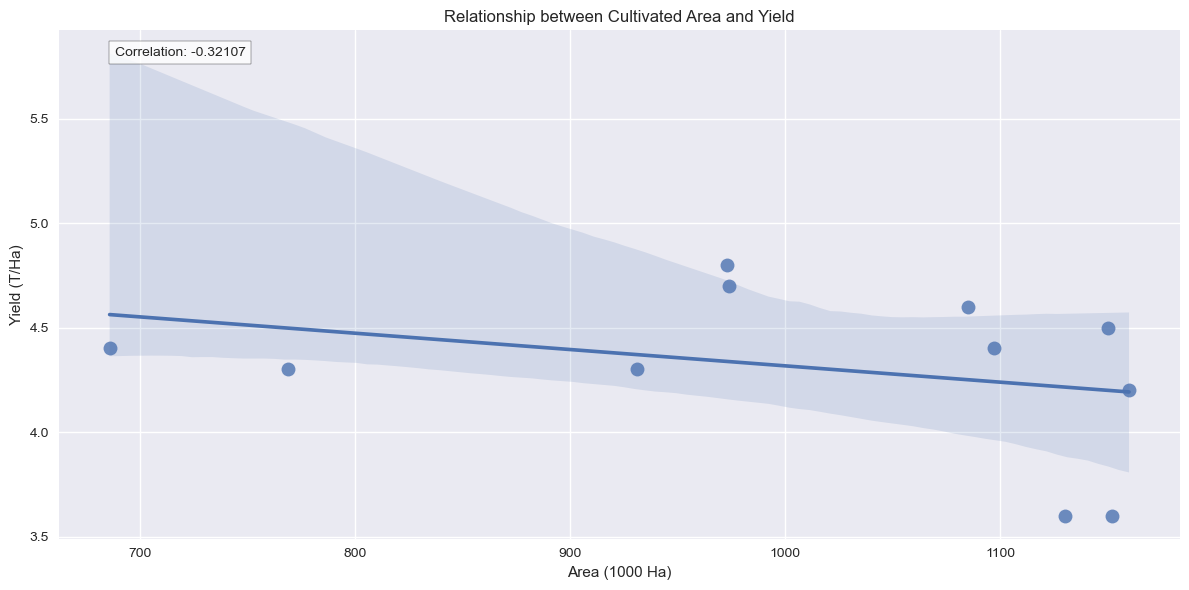

In [129]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Area (1000 Ha)', y='Yield (T/Ha)', scatter_kws={'s': 100})
plt.title('Relationship between Cultivated Area and Yield')
plt.xlabel('Area (1000 Ha)')
plt.ylabel('Yield (T/Ha)')
plt.grid(True)
plt.tight_layout()

# Calculate correlation coefficient
correlation = df['Area (1000 Ha)'].corr(df['Yield (T/Ha)'])

# Add correlation coefficient to plot
plt.text(0.05, 0.95, 
         f'Correlation: {correlation:.5f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

##### A correlation value of -0.32107 suggests a moderate negative correlation between the cultivated area and yield. This means that as the cultivated area increases, the yield tends to decrease to some extent, although the relationship is not extremely strong.
### How the Fertilizer Ban (2021–2023) Could Affect Yield:
Decreased Productivity: Without chemical fertilizers, the soil may have become less fertile, leading to lower crop yields per hectare. Even if more land was cultivated, the productivity of each hectare might have dropped significantly.